In [2]:
import pandas as pd
a=pd.read_csv("/content/Disease_symptom_and_patient_profile_dataset.csv")
print(a)

         Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0      Influenza   Yes    No     Yes                  Yes   19  Female   
1    Common Cold    No   Yes     Yes                   No   25  Female   
2         Eczema    No   Yes     Yes                   No   25  Female   
3         Asthma   Yes   Yes      No                  Yes   25    Male   
4         Asthma   Yes   Yes      No                  Yes   25    Male   
..           ...   ...   ...     ...                  ...  ...     ...   
344       Stroke   Yes    No     Yes                   No   80  Female   
345       Stroke   Yes    No     Yes                   No   85    Male   
346       Stroke   Yes    No     Yes                   No   85    Male   
347       Stroke   Yes    No     Yes                   No   90  Female   
348       Stroke   Yes    No     Yes                   No   90  Female   

    Blood Pressure Cholesterol Level Outcome Variable  
0              Low            Normal         Positive  

In [7]:
import pandas as pd
c={'True':1,'False':0,'Yes':1,'No':0,'Positive':1,'Negative':0,'Male':1,'Female':0,'low':0,'Normal':0,'High':1}
a=a.replace(c)
dropping=['Disease','Blood Pressure','Cholesterol Level']
d=a.drop(columns=dropping)
print(d)

     Fever  Cough  Fatigue  Difficulty Breathing  Age  Gender  \
0        1      0        1                     1   19       0   
1        0      1        1                     0   25       0   
2        0      1        1                     0   25       0   
3        1      1        0                     1   25       1   
4        1      1        0                     1   25       1   
..     ...    ...      ...                   ...  ...     ...   
344      1      0        1                     0   80       0   
345      1      0        1                     0   85       1   
346      1      0        1                     0   85       1   
347      1      0        1                     0   90       0   
348      1      0        1                     0   90       0   

     Outcome Variable  
0                   1  
1                   0  
2                   0  
3                   1  
4                   1  
..                ...  
344                 1  
345                 1  
346

In [8]:
y=d["Outcome Variable"]
print(y)

0      1
1      0
2      0
3      1
4      1
      ..
344    1
345    1
346    1
347    1
348    1
Name: Outcome Variable, Length: 349, dtype: int64


In [9]:
x=d.drop("Outcome Variable", axis=1)
print(x)

     Fever  Cough  Fatigue  Difficulty Breathing  Age  Gender
0        1      0        1                     1   19       0
1        0      1        1                     0   25       0
2        0      1        1                     0   25       0
3        1      1        0                     1   25       1
4        1      1        0                     1   25       1
..     ...    ...      ...                   ...  ...     ...
344      1      0        1                     0   80       0
345      1      0        1                     0   85       1
346      1      0        1                     0   85       1
347      1      0        1                     0   90       0
348      1      0        1                     0   90       0

[349 rows x 6 columns]


In [10]:
from sklearn.model_selection import train_test_split
X_test, X_train = train_test_split(a, test_size=0.2, random_state=100)
print("train set")
print(X_train.shape)
print(X_train)
print("\ntest")
print(X_test)
print(X_test.shape)

train set
(70, 10)
                Disease  Fever  Cough  Fatigue  Difficulty Breathing  Age  \
197           Pneumonia      1      1        1                     1   45   
189        Hypertension      1      0        1                     0   45   
7             Influenza      1      1        1                     1   25   
46            Influenza      1      1        1                     1   30   
136            Lymphoma      0      1        0                     0   40   
..                  ...    ...    ...      ...                   ...  ...   
31            Sinusitis      0      1        1                     0   30   
178          Zika Virus      0      1        1                     0   45   
247   Esophageal Cancer      0      0        1                     0   55   
47   Multiple Sclerosis      0      0        1                     0   30   
118      Osteoarthritis      0      0        1                     0   40   

     Gender Blood Pressure Cholesterol Level  Outcome Va

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5714285714285714


In [12]:
#SVM
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.5571428571428572


In [13]:
import numpy as np
x1 = np.random.rand(10, 15)
w=[-0.5,-0.2,-0.7,0.9,-0.5,0.6,-0.9,0.7,-0.8,-0.3,-0.8,0.1,-0.7,0.2,-0.6]

def perceptron(w, x1, b):
    yp = []
    for i in range(len(x1)):
        s = np.dot(x1[i], w) + b
        s2 = 1 / (1 + np.exp(-s))
        if s2 >= 0.5:
            yp.append(1)
        else:
            yp.append(0)
    return yp
b= float(input("enter b:"))
predicted_values = perceptron(w, x1, b)
print(predicted_values)

enter b:4
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)
accuracy_KNN = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print(classification_report(y_test, y_pred))

[1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1
 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1]
Accuracy is : 0.5714285714285714
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        30
           1       0.71      0.62      0.67        40

    accuracy                           0.64        70
   macro avg       0.64      0.65      0.64        70
weighted avg       0.65      0.64      0.64        70



In [22]:
print("Accuracy is :",accuracy)
print(classification_report(y_test, y_pred))
from sklearn.utils import resample
# Define the machine learning model
model = LogisticRegression()
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_lgr = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample, y_sample)
    # Evaluate the model on the testing dataset
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_lgr.append(score)

Accuracy is : 0.5714285714285714
              precision    recall  f1-score   support

           0       0.48      0.47      0.47        30
           1       0.61      0.62      0.62        40

    accuracy                           0.56        70
   macro avg       0.55      0.55      0.55        70
weighted avg       0.56      0.56      0.56        70



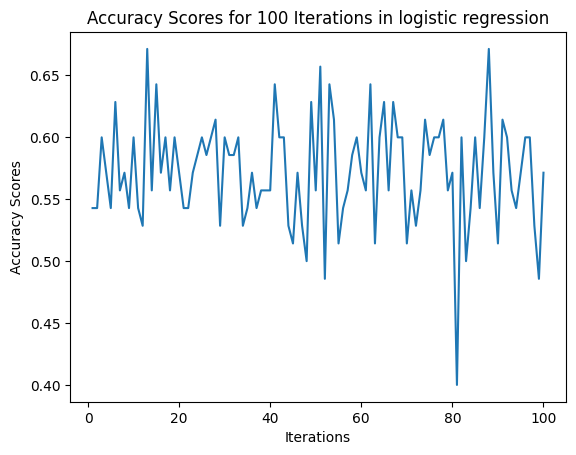

In [24]:
import matplotlib.pyplot as plt
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_lgr)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in logistic regression")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

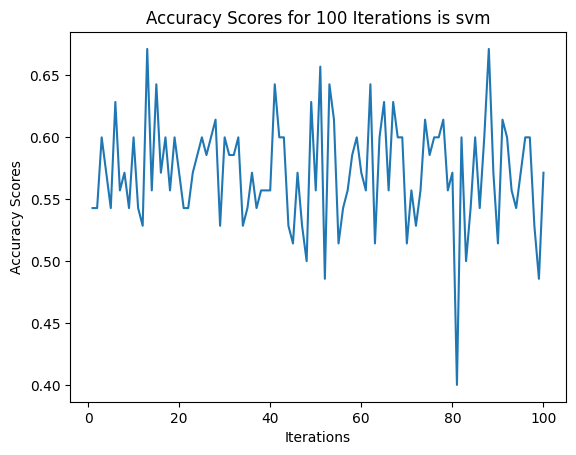

In [29]:
from sklearn.utils import resample
# Define the machine learning model
model = SVC(kernel='linear', C=1, random_state=42)
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_svc= list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample, y_sample)
    # Evaluate the model on the testing dataset
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_svc.append(score)
    iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_lgr)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations is svm")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

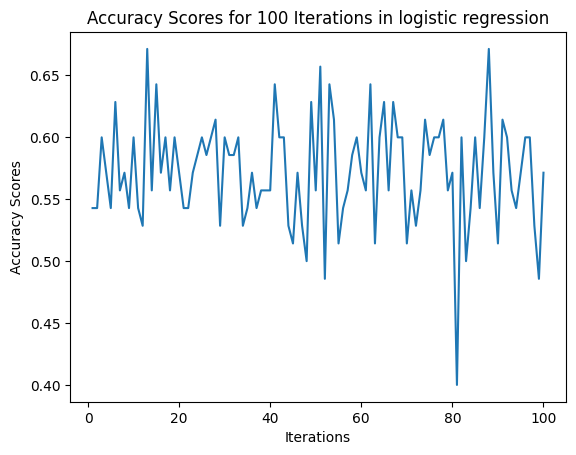

In [30]:
from sklearn.utils import resample
# Define the machine learning model
model = KNeighborsClassifier(n_neighbors=3)
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_knn = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample, y_sample)
    # Evaluate the model on the testing dataset
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_knn.append(score)
    iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_lgr)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in knn")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()